Dataset loaded successfully!
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
   total_bill   tip     sex smoker  day    time  size bill_category
0       16.99  1.01  Female     No  Sun  Dinner     2        medium
1       10.34  1.66    Male     No  Sun  Dinner     3        medium
2       21.01  3.50    Male     No  Sun  Dinner     3          high
3       23.68  3.31    Male     No  Sun  Dinner     2          high
4       24.59  3.61  Female     No  Sun  Dinner     4          high
Accuracy: 61.22%


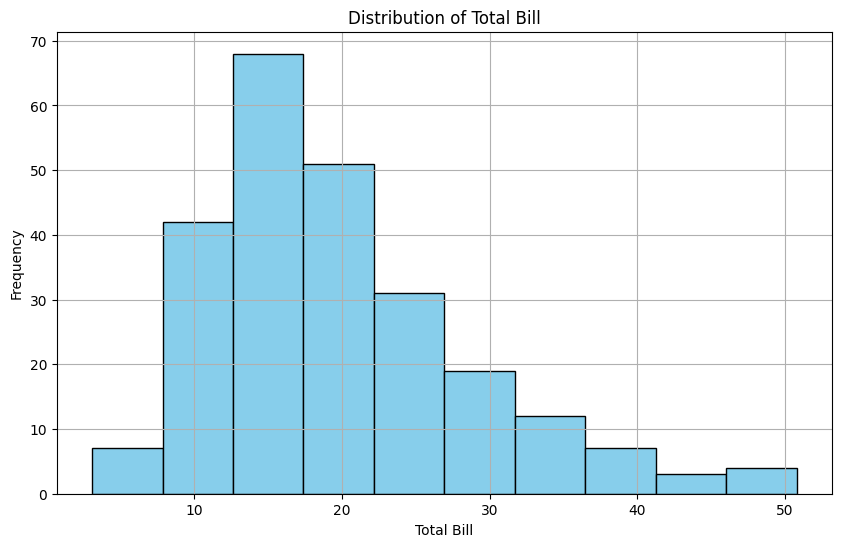

C:\Users\H TECH\AppData\Local\Temp\ipykernel_9384\1116451935.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bill_category', data=data, palette='viridis')


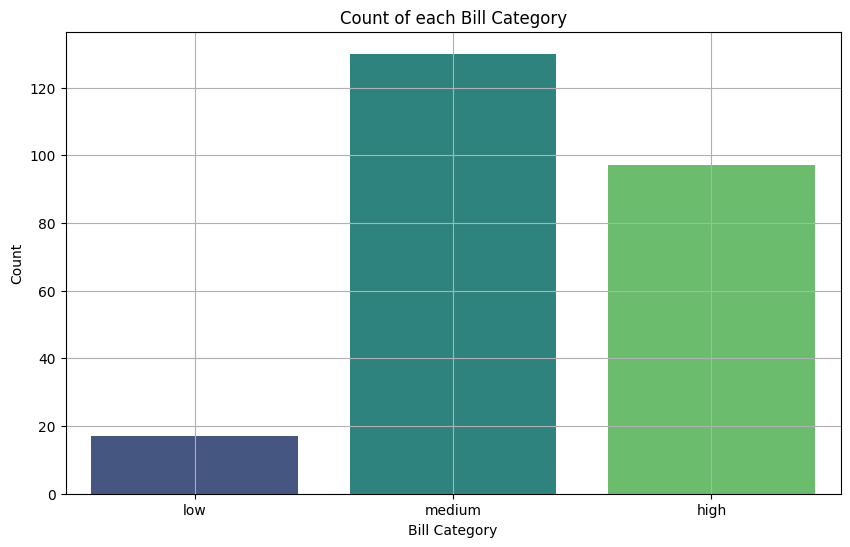

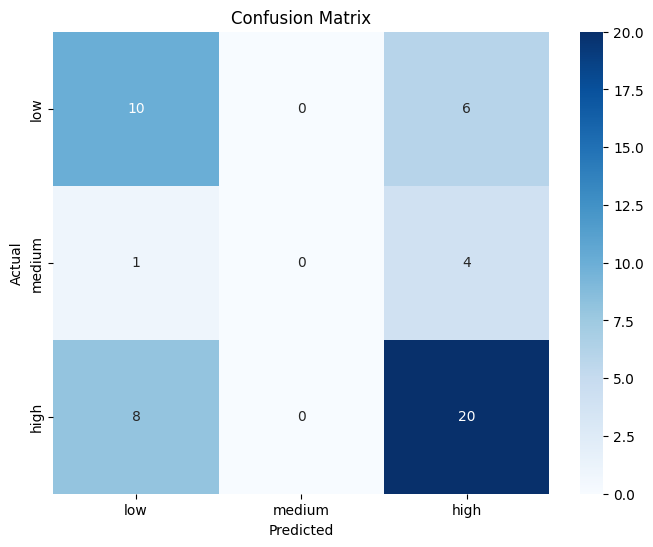

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


data = sns.load_dataset('tips')


print("Dataset loaded successfully!")
print(data.head()) 
print(data.columns) 


bins = [0, 10, 20, 60] 
labels = ['low', 'medium', 'high']
data['bill_category'] = pd.cut(data['total_bill'], bins=bins, labels=labels, right=False)


data = data.dropna(subset=['bill_category'])


print(data.head())


X = data[['size']]  # Using 'size' as the feature (you can add more features if needed)
y = data['bill_category']  # Target variable: 'bill_category' (the discretized 'total_bill')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plotting
# 1. Histogram of 'total_bill'
plt.figure(figsize=(10, 6))
plt.hist(data['total_bill'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Bar plot for 'bill_category'
plt.figure(figsize=(10, 6))
sns.countplot(x='bill_category', data=data, palette='viridis')
plt.title('Count of each Bill Category')
plt.xlabel('Bill Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 3. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Iris Dataset loaded successfully!
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Iris Dataset Accuracy: 100.00%


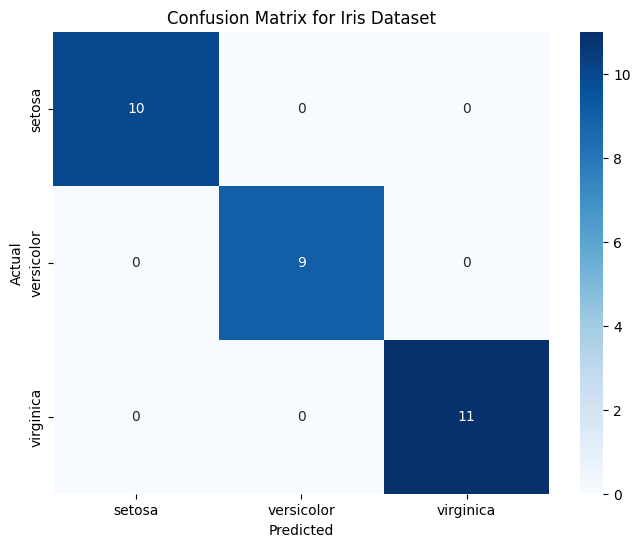

In [2]:
# Load a different dataset (e.g., iris dataset)
iris_data = sns.load_dataset('iris')

# Display the first few rows of the dataset
print("Iris Dataset loaded successfully!")
print(iris_data.head())
print(iris_data.columns)

# Example preprocessing: Selecting features and target
X_iris = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y_iris = iris_data['species']  # Target variable

# Split the dataset into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train a Naive Bayes model on the new dataset
model_iris = GaussianNB()
model_iris.fit(X_train_iris, y_train_iris)

# Make predictions
y_pred_iris = model_iris.predict(X_test_iris)

# Evaluate the model's performance
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
conf_matrix_iris = confusion_matrix(y_test_iris, y_pred_iris)

# Print the accuracy
print(f'Iris Dataset Accuracy: {accuracy_iris * 100:.2f}%')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_iris, annot=True, fmt='d', cmap='Blues', xticklabels=model_iris.classes_, yticklabels=model_iris.classes_)
plt.title('Confusion Matrix for Iris Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [1]:
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

dataset = sns.load_dataset('tips')
dataset.head()

x = dataset[['total_bill', 'size']]
y = dataset[['tip']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = SVR()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print(mean_absolute_error(y_test, y_predict))
print(r2_score(y_test, y_predict))

0.5606501260504805
0.5721968127152731


e:\PythonImp\anaconda\envs\python_ml\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



📌 First 5 rows of dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

📌 Available columns in dataset: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

🎯 Model Accuracy: 100.00%

📊 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


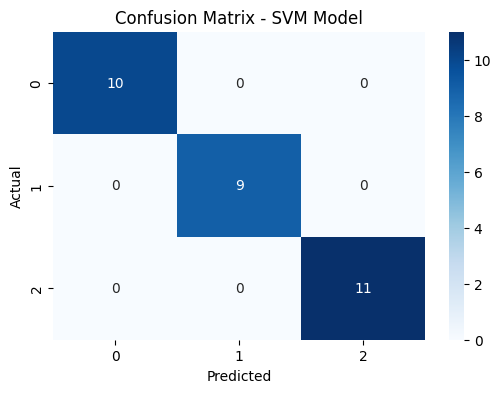


📌 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the iris dataset using seaborn
df = sns.load_dataset('iris')

# Display first few rows to confirm loading
print("\n📌 First 5 rows of dataset:")
print(df.head())

# Check column names
print("\n📌 Available columns in dataset:", df.columns.tolist())

# Prepare data for SVM
X = df.drop(columns=['species'])  # Features
y = df['species']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Model
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Make Predictions
y_pred = svm_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Model")
plt.show()

# Print Classification Report
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load Titanic dataset
data = sns.load_dataset('titanic')

# Step 2: Select relevant features and drop rows with missing values
df = data[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()

# Step 3: Encode categorical columns
label_encoders = {}
for col in ['sex', 'embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 4: Define features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Step 5: Train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# Step 7: Make predictions
y_pred = nb_model.predict(x_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 9: Print evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        80
           1       0.73      0.73      0.73        63

    accuracy                           0.76       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.76      0.76      0.76       143

Confusion Matrix:
 [[63 17]
 [17 46]]


Accuracy: 69.39%


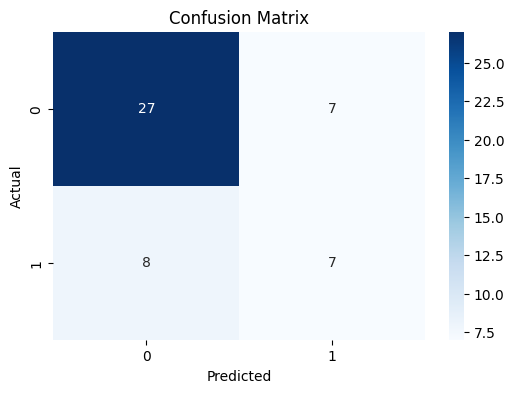

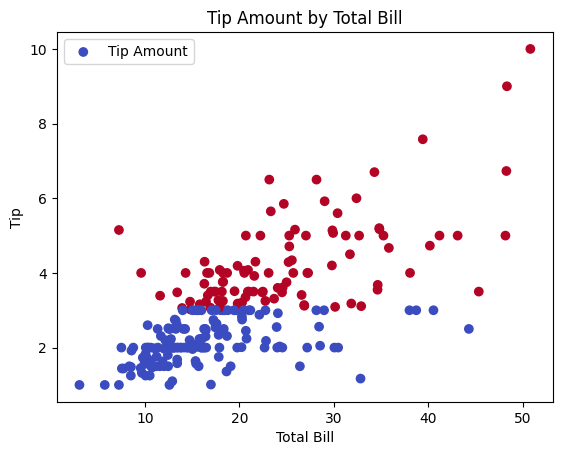

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load tips dataset
df = sns.load_dataset('tips')

# Binary classification: High tip (1) if tip > 3, else Low tip (0)
df['high_tip'] = (df['tip'] > 3).astype(int)

# Use 'total_bill' as the feature to predict high_tip
X = df[['total_bill']]
y = df['high_tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Scatter plot of total_bill vs tip, colored by high_tip
plt.scatter(df['total_bill'], df['tip'], c=df['high_tip'], cmap='coolwarm', label='Tip Amount')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip Amount by Total Bill')
plt.legend()
plt.show()


In [ ]:
import cv2
import numpy as np

# Load image
image = cv2.imread('./image.jpg')

# Convert to HSV for better color targeting
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define red range
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)

lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

# Combine masks
mask = mask1 | mask2

# Inpaint the red areas
inpainted = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

cv2.imwrite("cleaned_image.jpg", inpainted)


ModuleNotFoundError: No module named 'cv2'